## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0-rc0


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'dataset_img2'
# valid_path = 'd\\test'


In [16]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], include_top=False)




In [17]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [18]:
  # useful for getting number of output classes
folders = glob('dataset_img2\\*')

In [19]:
folders

['dataset_img2\\0', 'dataset_img2\\1', 'dataset_img2\\2', 'dataset_img2\\3']

In [20]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [21]:
len(folders)

4

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [23]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [24]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [25]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2
                            
                                    )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('dataset_img2',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                class_mode = 'categorical',
                                                subset="training"         
                                                 )
# Make sure you provide the same target size as initialied for the image size
validation_set = train_datagen.flow_from_directory('dataset_img2',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                class_mode = 'categorical',
                                                subset="validation"         
                                                 )

Found 642 images belonging to 4 classes.
Found 158 images belonging to 4 classes.


In [27]:
test_set = test_datagen.flow_from_directory('d\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'd\\test'

In [28]:
# fit the model
# Run the cell. It will take some time to execute

r=model.fit(
  training_set,
  validation_data=validation_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)  
)

Epoch 1/5
21/21 [==============================] - 202s 10s/step - loss: 1.5651 - accuracy: 0.2882 - val_loss: 1.4070 - val_accuracy: 0.2532
Epoch 2/5
21/21 [==============================] - 193s 9s/step - loss: 1.4994 - accuracy: 0.2632 - val_loss: 1.6223 - val_accuracy: 0.2785
Epoch 3/5
21/21 [==============================] - 211s 10s/step - loss: 1.5259 - accuracy: 0.2430 - val_loss: 1.5159 - val_accuracy: 0.3481
Epoch 4/5
21/21 [==============================] - 204s 10s/step - loss: 1.5453 - accuracy: 0.2555 - val_loss: 1.6313 - val_accuracy: 0.3418
Epoch 5/5
21/21 [==============================] - 201s 10s/step - loss: 1.5053 - accuracy: 0.3146 - val_loss: 1.4679 - val_accuracy: 0.2532


In [156]:
import matplotlib.pyplot as plt

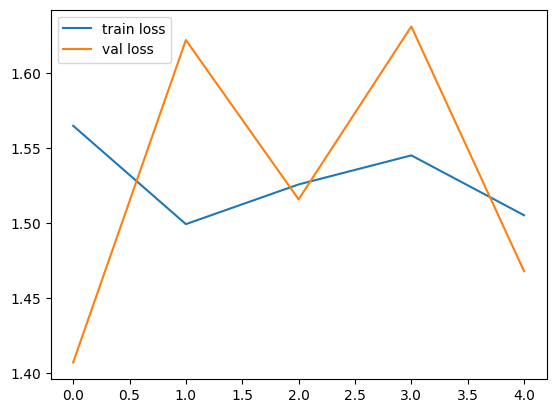

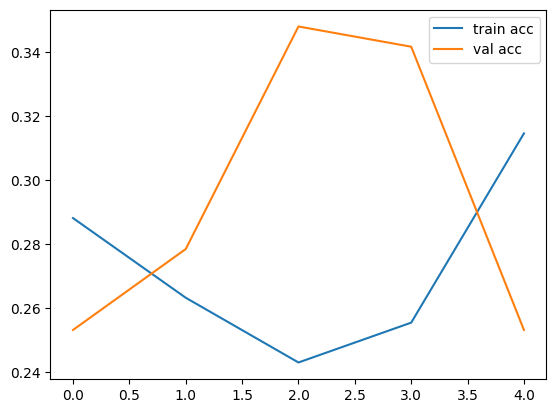

<Figure size 640x480 with 0 Axes>

In [29]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file


# from tensorflow.keras.models import load_model
# model=load_model()
model.save('model_vgg16_weather.h5')
model.evaluate(validation_set)

5/5 [==============================] - 40s 8s/step - loss: 1.4413 - accuracy: 0.3671


[1.441338300704956, 0.3670886158943176]

In [31]:
ypred=model.predict(test_set)
# test_set.classes

NameError: name 'test_set' is not defined

(224, 224)


ValueError: in user code:

    File "c:\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python311\Lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_1' (type Functional).
    
    Input 0 of layer "block1_conv1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 224, 224)
    
    Call arguments received by layer 'model_1' (type Functional):
      • inputs=tf.Tensor(shape=(None, 224, 224), dtype=float32)
      • training=False
      • mask=None


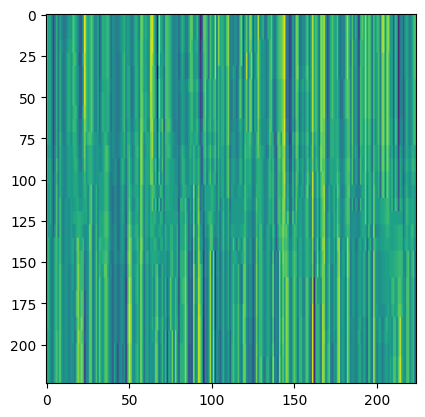

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def load(filename):
   np_image = Image.open(filename)
   print(np_image.size)
   # np_image=np_image.resize((224,224))
   plt.imshow(np_image)
   np_image = np.array(np_image).astype('float32')/255
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

images=['dataset/test/tbone/9.jpg','dataset/test/toppel/9.jpg','dataset/test/toppel/9.jpg','dataset/test/tbone/10.jpg','dataset/test/tbone/16.jpg','dataset/test/headon/3.jpg','dataset/test/headon/13.jpg']

img=load('dataset_img2/0/0.jpg')
np.argmax(model.predict(img))